<a href="https://colab.research.google.com/github/sneh6677/PCSProject/blob/main/CVD_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler


Data Set cleaning and Preprocessing

In [58]:
cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv("processed.cleveland.data",  names=cols)
df['target'] = df['target'].replace({2: 1, 3: 1, 4: 1})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [21]:
# Replace '?' with NaN
df = df.replace('?', np.nan)

# Convert columns to numeric, coerce errors to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Impute missing values using the mean of each column
# or choose a different strategy if more appropriate.
df = df.fillna(df.mean())

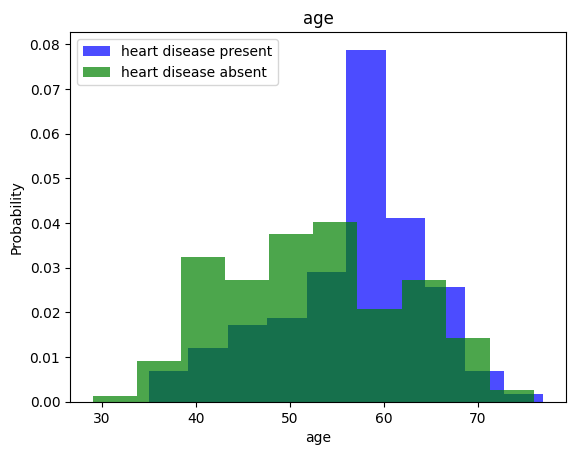

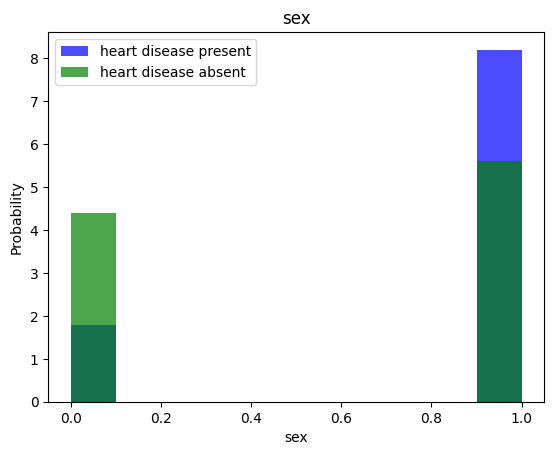

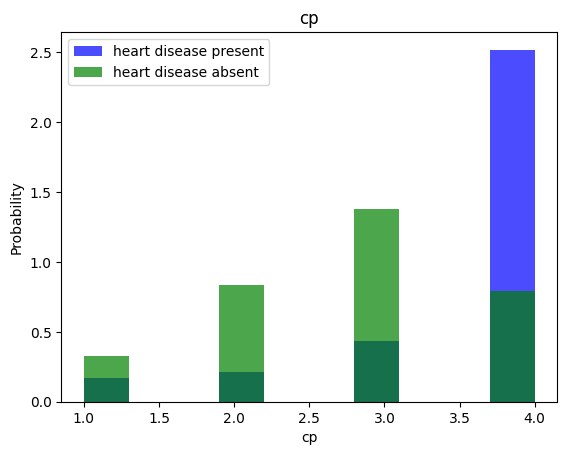

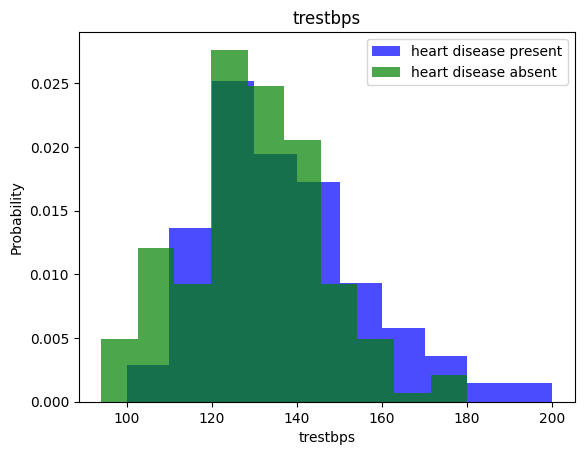

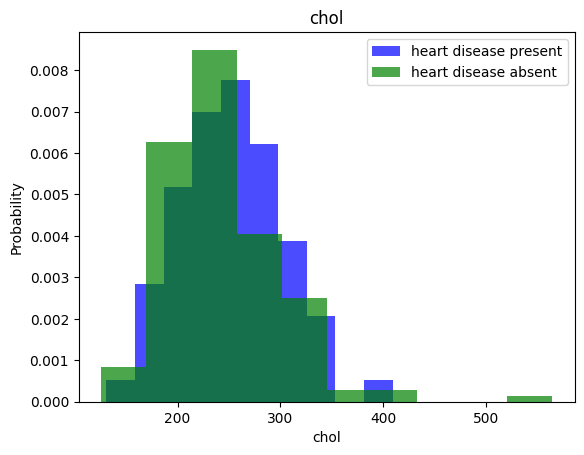

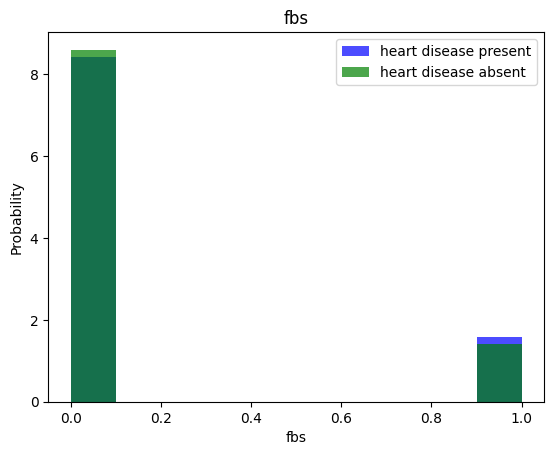

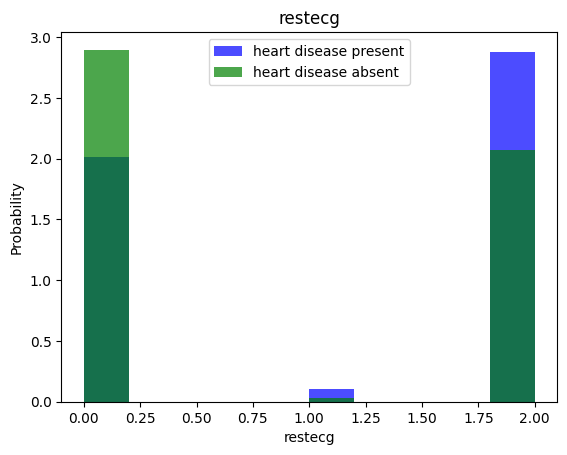

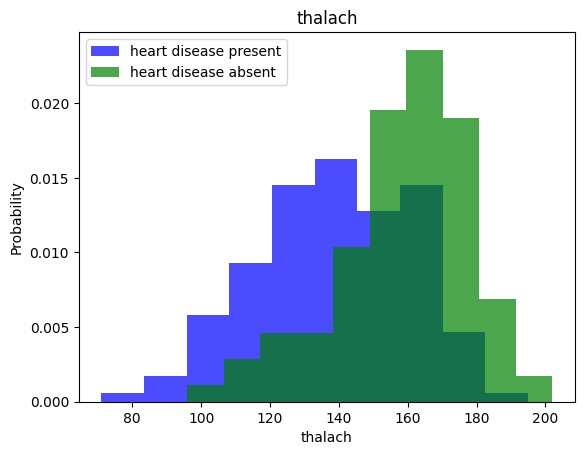

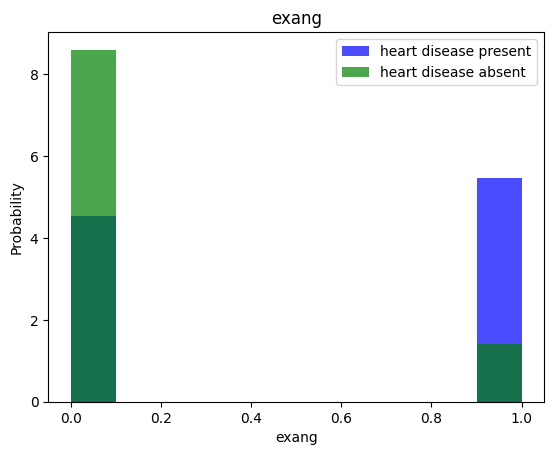

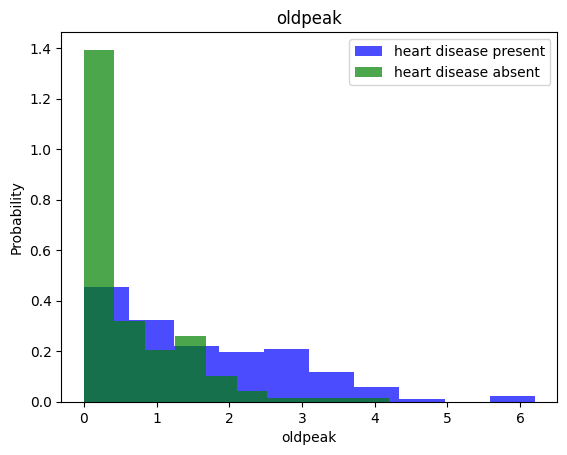

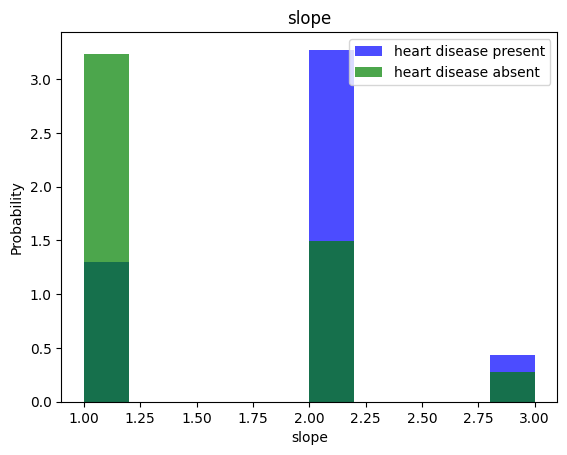

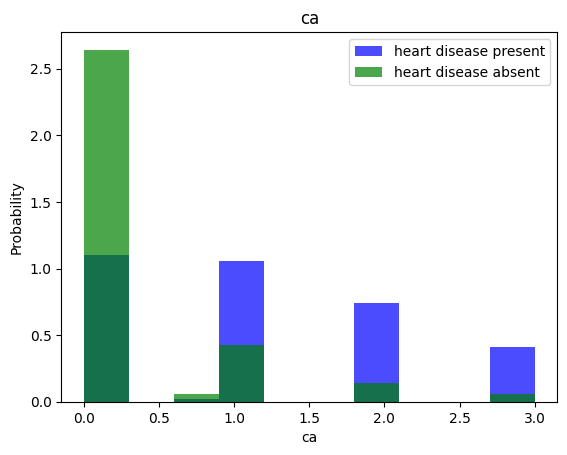

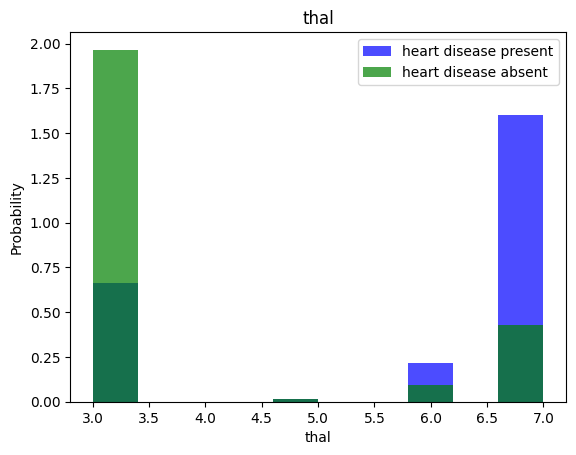

In [23]:
for label in cols[:-1]:
   mp.hist(df[df['target'] == 1][label], color='blue', label='heart disease present', alpha=0.7, density=True)
   mp.hist(df[df['target'] == 0][label], color='green', label='heart disease absent', alpha=0.7, density=True)
   mp.title(label)
   mp.ylabel('Probability')
   mp.xlabel(label)
   mp.legend()
   mp.show()

Splitting the data set for training, Validation and testing

In [38]:
train, validate, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Data before oversampling

In [39]:
print(len(train [train['target'] == 1]))
print(len(train [train['target'] == 0]))

87
94


Scaling and oversampling


In [47]:
def scale_data(df, oversample = False):
  x = df[df.columns[:-1]].values
  y = df[df.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)
  data = np.hstack((x, np.reshape(y, (-1, 1)))) #creating a 2D  numpy array

  return data, x, y


In [48]:
train_s, x_train, y_train = scale_data(train, oversample=True)
test_s, x_test, y_test = scale_data(test, oversample=False)
validate_s, x_validate, y_validate = scale_data(validate, oversample=False)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [49]:
sum(y_train==1)


94

In [50]:
sum(y_train==0)

94

K-Nearest N


In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [65]:
kn_model = KNeighborsClassifier(n_neighbors=10)
kn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [66]:
y_pred = kn_model.predict(x_test)

In [67]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])

In [68]:
y_test

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.82      0.79      0.81        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

